In [1]:
# Import libraries that'll be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import h5py
import math
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
plt.rc('axes.formatter', useoffset = False)
plt.rc('text', usetex = True)
plt.rc('font', style  = 'normal')
plt.rc('font', **{'family': 'Times New Roman'})
ticksize = 5
plt.rc('xtick.major', size = ticksize);  plt.rc('ytick.major', size = ticksize)

In [2]:
print("Current working directory:", os.getcwd())

Current working directory: /Users/bxiao/Research/Quantum_Computing/Holographic_Quantum_Algorithms


In [3]:
goldenRatio = (5**.5 - 1) / 2.

### Analyze local observable e.g. $S_{z}$, spin correlation function $C_{zz}$ and overlap of wavefunctions

In [116]:
file = h5py.File("TEBD_N8_h0.2_Info.h5", "r")

In [117]:
file.keys()

<KeysViewHDF5 ['Czz', 'Sz', 'Wavefunction Overlap']>

(8, 101)
(101,)


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


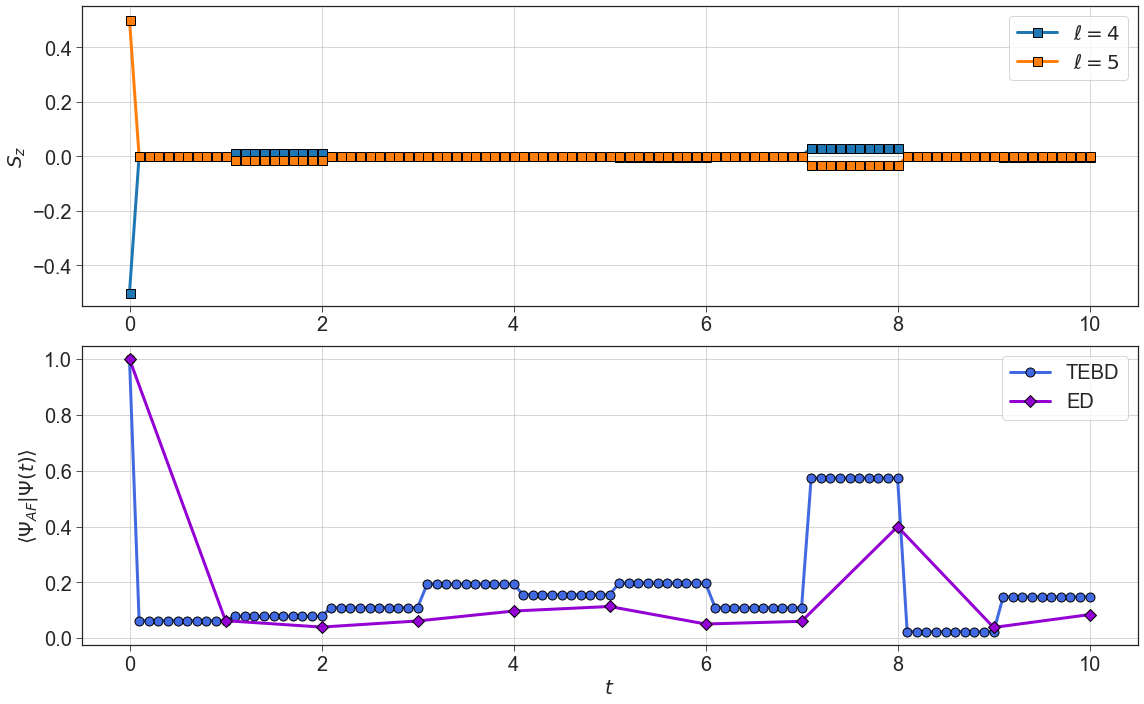

In [144]:
'''
    Plot time evolution of Sz on the central site (N//2) and overlap of the initial wavefunction and time-evolved wavefunction
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

ax1 = fig.add_subplot(spec[0, 0])
Sz = np.array(file['Sz']); print(Sz.shape)
ax1.plot(np.arange(0., 10.1, 0.1), Sz[3, :], linewidth = 3, marker = 's', markersize = 9, 
        markeredgecolor = 'black', label = r'$\ell=4$')
ax1.plot(np.arange(0., 10.1, 0.1), Sz[4, :], linewidth = 3, marker = 's', markersize = 9, 
        markeredgecolor = 'black', label = r'$\ell=5$')
ax1.set_ylabel(r'$S_{z}$', fontsize = 20)
ax1.tick_params(axis = "both", which = "major", labelsize = 20)
ax1.grid()
ax1.legend(frameon = True, fontsize = 20)

ax2 = fig.add_subplot(spec[1, 0])
PsiOverlap = np.array(file['Wavefunction Overlap']); print(PsiOverlap.shape)
ax2.plot(np.arange(0., 10.1, 0.1), PsiOverlap, color = 'royalblue', linewidth = 3, marker = 'o', markersize = 9,
        markeredgecolor = 'black', label = r'TEBD')
ax2.plot(np.arange(0, 11, 1), np.real(PsiOverlap_ED), color = 'darkviolet', linewidth = 3, marker = 'D', markersize = 9,
        markeredgecolor = 'black', label = r'ED')
ax2.set_xlabel(r'$t$', fontsize = 20)
ax2.set_ylabel(r'$\langle \Psi_{AF} | \Psi(t) \rangle$', fontsize = 20)
ax2.tick_params(axis = "both", which = "major", labelsize = 20)
ax2.legend(frameon = True, fontsize = 20)
ax2.grid()

(101, 8)


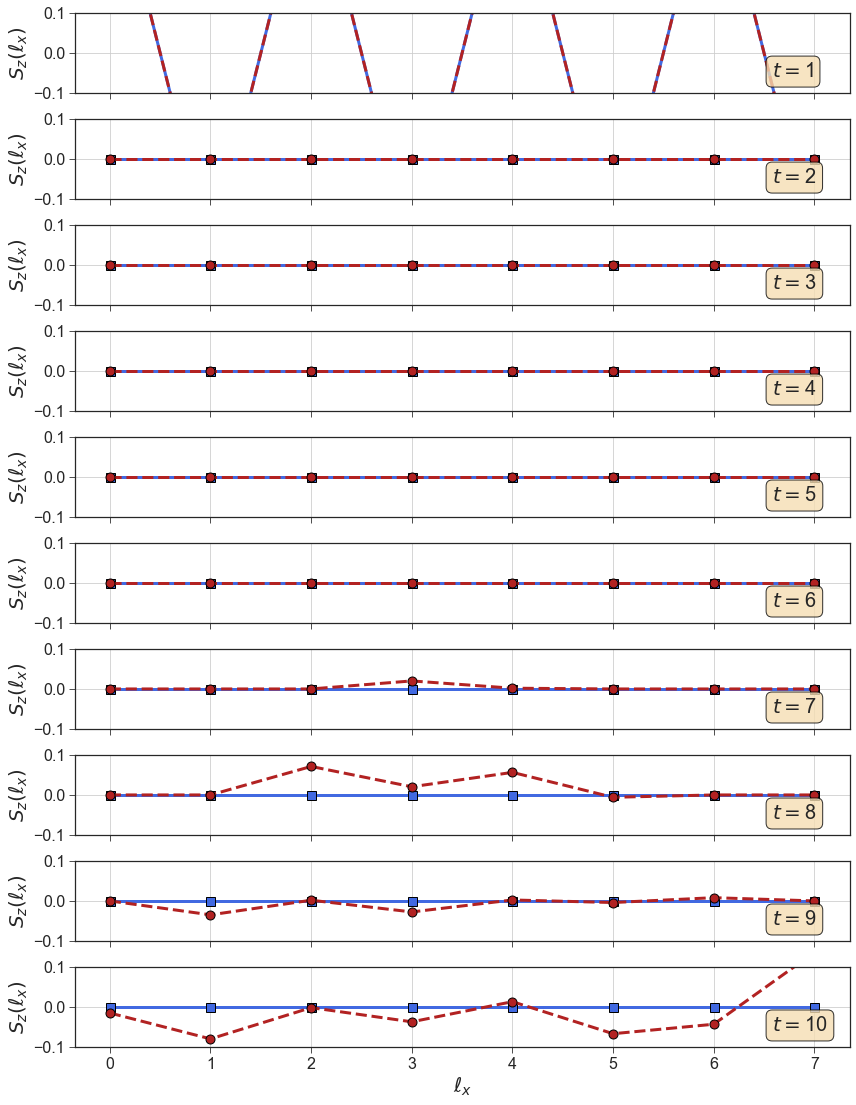

In [259]:
fig = plt.figure(figsize = (12, 25 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 10, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

Sz = np.transpose(np.array(file['Sz'])); print(Sz.shape)
for ind in range(10):
    ax1 = fig.add_subplot(spec[ind, 0])
    ax1.plot(np.arange(8), np.real(Sz[ind * 10, :]), linewidth = 3, color = 'royalblue', \
             marker = 's', markersize = 9, markeredgecolor = 'black')
    ax1.plot(np.arange(0., 8, 1), np.real(ED_Sz[:, ind]), linestyle = '--', linewidth = 3, color = 'firebrick', \
             marker = 'o', markersize = 9, markeredgecolor = 'black')
    ax1.grid()

    if ind == timeSlice - 1:
        ax1.set_xlabel(r'$\ell_{x}$', fontsize = 20)
    else:
        ax1.set_xticklabels([])
    ax1.set_ylim(-0.1, 0.1)
    ax1.set_ylabel(r'$S_{z}(\ell_{x})$', fontsize = 20)
    ax1.tick_params(axis = "both", which = "major", labelsize = 16)
    ax1.text(.9, .2, r'$t = $' + str(ind + 1), transform = ax1.transAxes, fontsize = 20, 
            bbox = dict(boxstyle = "round", facecolor = 'wheat', alpha = .8))

In [125]:
# fileRandomInit = h5py.File("TEBD_N10_RandomInit_Info.h5", "r")

In [126]:
# '''
#     Plot time evolution of Sz on the central site (N//2) and overlap of the initial wavefunction and time-evolved wavefunction
# '''

# fig = plt.figure(figsize = (12, 12 * goldenRatio), tight_layout = True)
# spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)
# plt.style.use('seaborn-ticks')

# ax1 = fig.add_subplot(spec[0, 0])
# Sz = np.array(fileRandomInit['Sz']); print(Sz)
# ax1.plot(np.arange(0., 5.1, 0.1), Sz, color = 'firebrick', linewidth = 3, marker = 's', markersize = 9, 
#         markeredgecolor = 'black')
# ax1.set_ylabel(r'$S_{z}(N/2)$', fontsize = 16)
# ax1.tick_params(axis = "both", which = "major", labelsize = 16)
# ax1.grid()

# ax2 = fig.add_subplot(spec[1, 0])
# PsiOverlap = np.array(fileRandomInit['Wavefunction Overlap']); print(PsiOverlap.shape)
# ax2.plot(np.arange(0., 5., 0.1), PsiOverlap, color = 'royalblue', linewidth = 3, marker = 'o', markersize = 9,
#         markeredgecolor = 'black')
# ax2.set_xlabel(r'$t$', fontsize = 16)
# ax2.set_ylabel(r'$\langle \Psi_{random} | \Psi(t) \rangle$', fontsize = 16)
# ax2.tick_params(axis = "both", which = "major", labelsize = 16)
# ax2.grid()

(101, 64)


<ipython-input-146-0c318881d3c6>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(spec[ind, 0])


Text(0.5, 0, '$\\ell$')

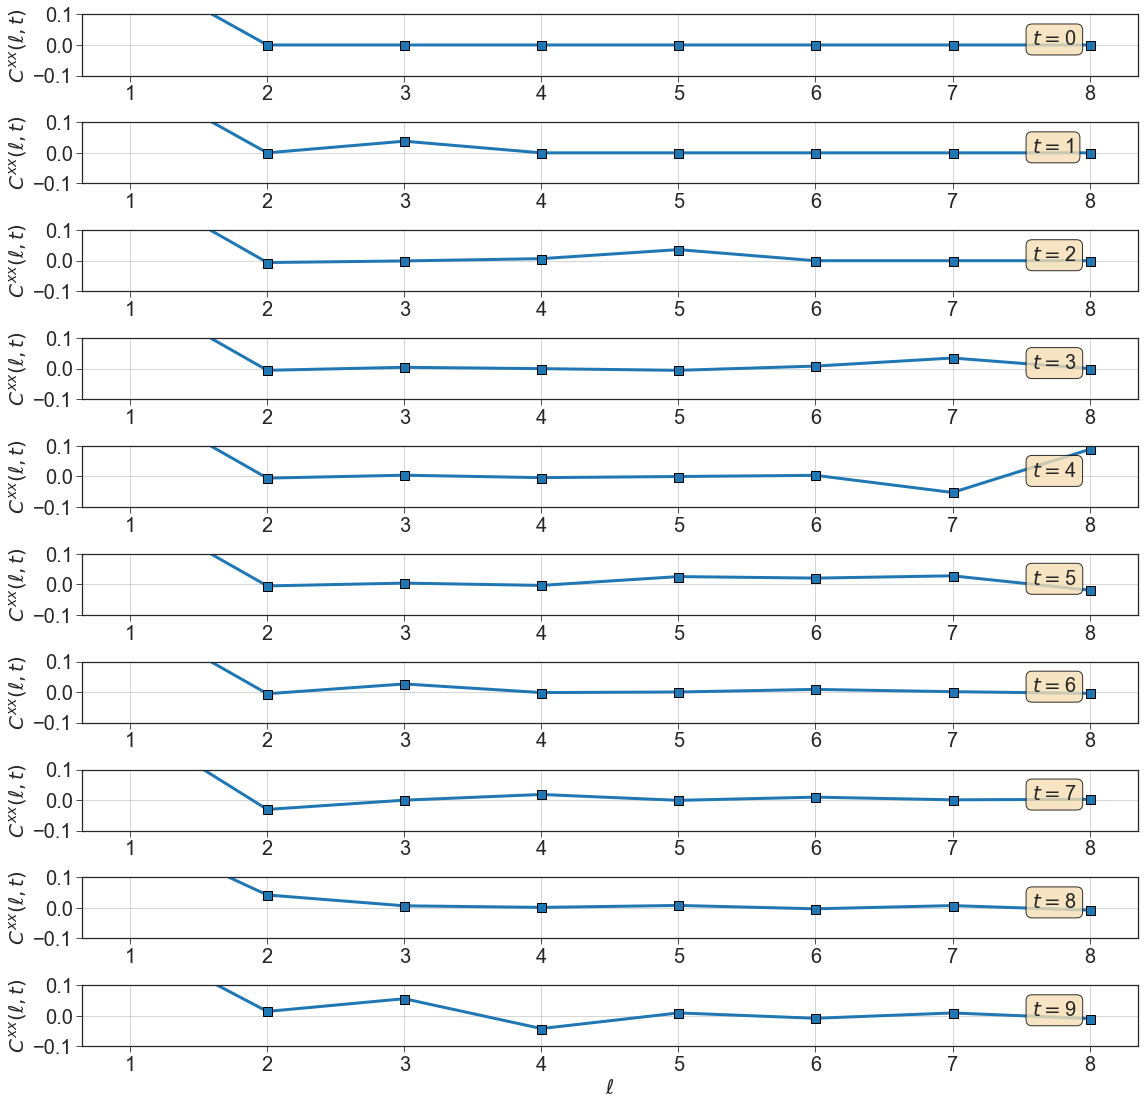

In [146]:
'''
    Plot time evolution of spin correlation function
'''

fig = plt.figure(figsize = (16, 25 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 10, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

ax1 = fig.add_subplot(spec[0, 0])
Czz = np.transpose(np.array(file['Czz'])); print(Czz.shape)
for ind in range(10):
    ax1 = fig.add_subplot(spec[ind, 0])
    ax1.plot(np.arange(1, 9, 1), np.real(Czz[ind * 10, :8]), linewidth = 3, marker = 's', markersize = 9, 
        markeredgecolor = 'black')
    ax1.set_ylim(-.1, .1)
    ax1.set_ylabel(r'$C^{xx}(\ell, t)$', fontsize = 20)
    ax1.tick_params(axis = "both", which = "major", labelsize = 20)
    ax1.grid()
    ax1.text(.9, .5, r'$t = $' + str(ind), transform = ax1.transAxes, fontsize = 20, 
            bbox = dict(boxstyle = "round", facecolor = 'wheat', alpha = .8))
ax1.set_xlabel(r'$\ell$', fontsize = 20)

In [31]:
# '''
#     Plot time evolution of spin correlation function
# '''

# fig = plt.figure(figsize = (12, 12 * goldenRatio), tight_layout = True)
# spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)
# plt.style.use('seaborn-ticks')

# ax1 = fig.add_subplot(spec[0, 0])
# Czz = np.transpose(np.array(fileRandomInit['Czz'])); print(Sz.shape)
# for ind in np.arange(0, 50, 10):
#     ax1.plot(np.arange(1, 11, 1), Czz[ind, :] + 0.005 * ind, linewidth = 3, marker = 's', markersize = 9, 
#         markeredgecolor = 'black')
#     ax1.axhline(y = 0.005 * ind, linewidth = 2, linestyle = '--', color = 'darkblue')
# ax1.set_xlabel(r'$\ell$', fontsize = 20)
# ax1.set_ylabel(r'$C_{z}(1, \ell)$', fontsize = 20)
# ax1.tick_params(axis = "both", which = "major", labelsize = 20)
# ax1.grid()

#### Analyze local observables $S_{z}$, spin correlation funciton $C_{z}$, and overlap of wavefunctions from ED results using MPS

In [107]:
fileED = h5py.File("RawData/ED_N8_h2.0_Info.h5", "r")

In [108]:
fileED.keys()

<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'Sx', 'Sy', 'Sz', 'Wavefunction Overlap']>

In [109]:
np.array(fileED['Wavefunction Overlap']).shape

(101,)

In [110]:
timeSlice = 10
physicalSite = 8

(8, 10)
(8, 101)


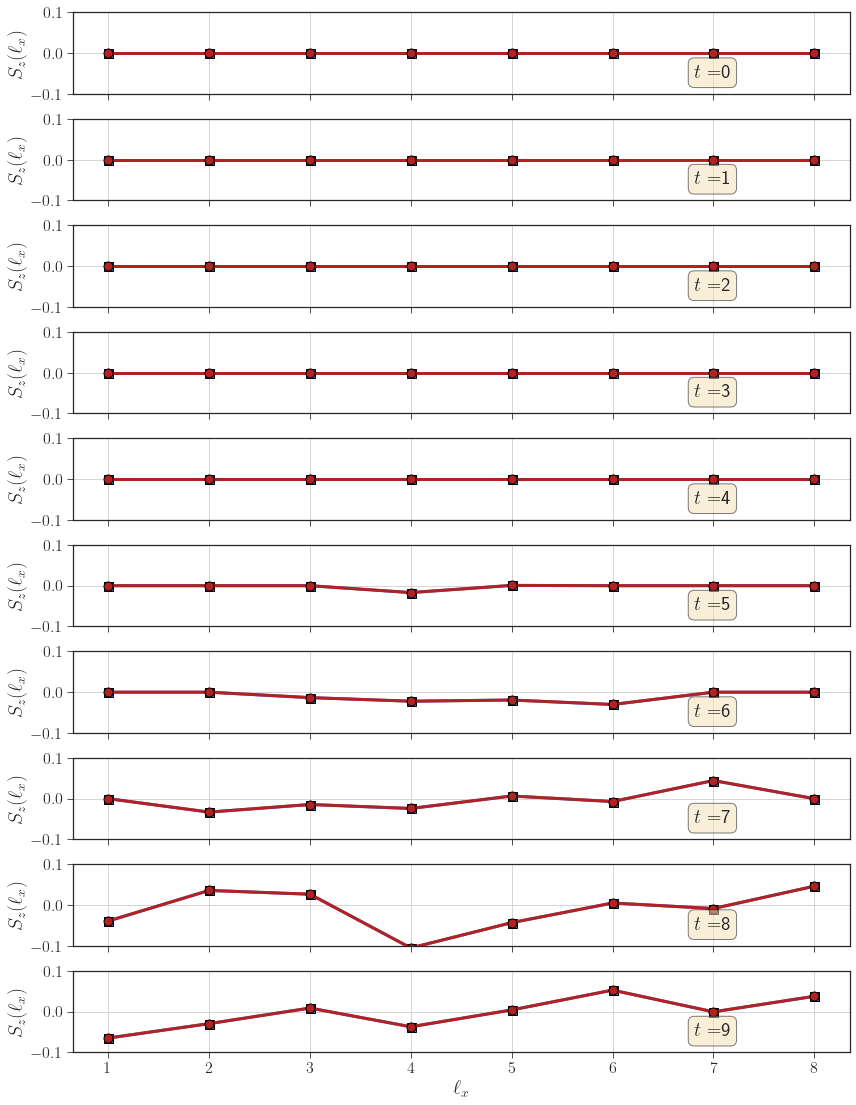

In [117]:
'''
    Plot time evolution of Sz on physical sites
'''

fig = plt.figure(figsize = (12, 25 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 10, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

ED_Sz = np.array(fileED['Sx']); print(ED_Sz.shape)
TEBD_Sz = np.array(fileTEBD['Sx']); print(TEBD_Sz.shape)
for ind in range(timeSlice):
    ax1 = fig.add_subplot(spec[ind, 0])
    ax1.plot(np.arange(1, 9, 1), np.real(ED_Sz[:, ind]), linewidth = 3, color = 'royalblue', \
             marker = 's', markersize = 9, markeredgecolor = 'black')
    ax1.plot(np.arange(1, 9, 1), np.real(TEBD_Sz[:, ind * 10]), linewidth = 3, color = 'firebrick', \
             marker = 'o', markersize = 9, markeredgecolor = 'black')
    ax1.grid()
#     print(np.real(ED_Sz[:, ind]))

    if ind == timeSlice - 1:
        ax1.set_xlabel(r'$\ell_{x}$', fontsize = 20)
    else:
        ax1.set_xticklabels([])
    ax1.set_ylim(-0.1, 0.1)
    ax1.set_ylabel(r'$S_{z}(\ell_{x})$', fontsize = 20)
    ax1.tick_params(axis = "both", which = "major", labelsize = 16)
    ax1.text(.8, .2, r'$t = $' + str(ind), transform = ax1.transAxes, fontsize = 20, 
            bbox = dict(boxstyle = "round", facecolor = 'wheat', alpha = .5))
# plt.savefig('ED_N8_h0.2_only_kicked_fields.pdf')

In [112]:
PsiOverlap_ED = np.array(fileED['Wavefunction Overlap'])
print(PsiOverlap_ED.shape)

(101,)


In [118]:
fileTEBD = h5py.File("RawData/TEBD_N8_h2.0_Info.h5", "r")
PsiOverlap_TEBD = np.array(fileTEBD['Wavefunction Overlap'])
PsiOverlap_TEBD.shape

(101,)

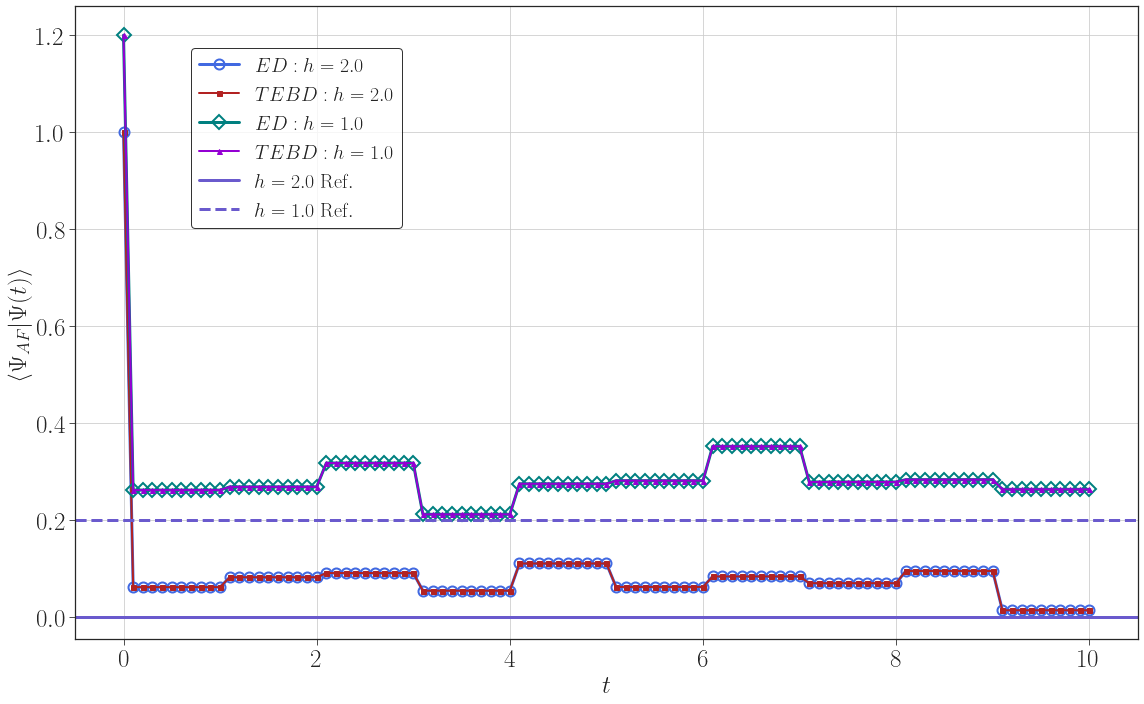

In [168]:
'''
    Plot time evolution of overlap of wavefunctions
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

path = "RawData/"
files = [["ED_N8_h2.0_Info.h5", "ED_N8_h1.0_Info.h5"], ["TEBD_N8_h2.0_Info.h5", "TEBD_N8_h1.0_Info.h5"]]
labels = [[r"$ED: h = 2.0$", r"$ED: h = 1.0$"], [r"$TEBD: h = 2.0$", r"$TEBD: h=1.0$"]]
symbols = [["o", "D"], ["s", "^"]]
colors = [["royalblue", "teal"], ["firebrick", "darkviolet"]]

ax2 = fig.add_subplot(spec[0, 0])
for ind in range(len(files[0])):
    pathED = path + files[0][ind]
    fileED = h5py.File(pathED, "r")
    PsiOverlap_ED = np.array(fileED['Wavefunction Overlap'])
    ax2.plot(np.arange(0, 10.1, 0.1), np.real(PsiOverlap_ED) + ind * 0.2, linewidth = 3, color = colors[0][ind], \
             marker = symbols[0][ind], markerfacecolor = "none", markersize = 10, markeredgewidth = 2, label = labels[0][ind])
    
    pathTEBD = path + files[1][ind]
    fileTEBD = h5py.File(pathTEBD, "r")
    PsiOverlap_TEBD = np.array(fileTEBD['Wavefunction Overlap'])
    ax2.plot(np.arange(0, 10.1, 0.1), np.real(PsiOverlap_TEBD) + ind * 0.2, linewidth = 2, \
         marker = symbols[1][ind], markeredgecolor = colors[1][ind], # markerfacecolor = "none", 
         markersize = 5, color = colors[1][ind], label = labels[1][ind])

ax2.axhline(y = 0.0, linewidth = 3, linestyle = "-", color = "slateblue", label = r"$h = 2.0$" + r"$\rm \; Ref.$")
ax2.axhline(y = 0.2, linewidth = 3, linestyle = "--", color = "slateblue", label = r"$h = 1.0$" + r"$\rm \; Ref.$")

# print(PsiOverlap_ED)
ax2.set_xlabel(r'$t$', fontsize = 25)
ax2.set_ylabel(r'$\langle \Psi_{AF} | \Psi(t) \rangle$', fontsize = 25)
ax2.tick_params(axis = "both", which = "major", labelsize = 25)
ax2.legend(loc = "upper left", fontsize = 20, ncol = 1, bbox_to_anchor = [.1, .95], fancybox = True, frameon = True, edgecolor = "black")
ax2.grid()

plt.savefig("Figures/TEBD_ED_N8.pdf")

In [101]:
# Czz = np.array(fileED['Czz'])
# Czz.shape

(8, 10)
(8, 101)


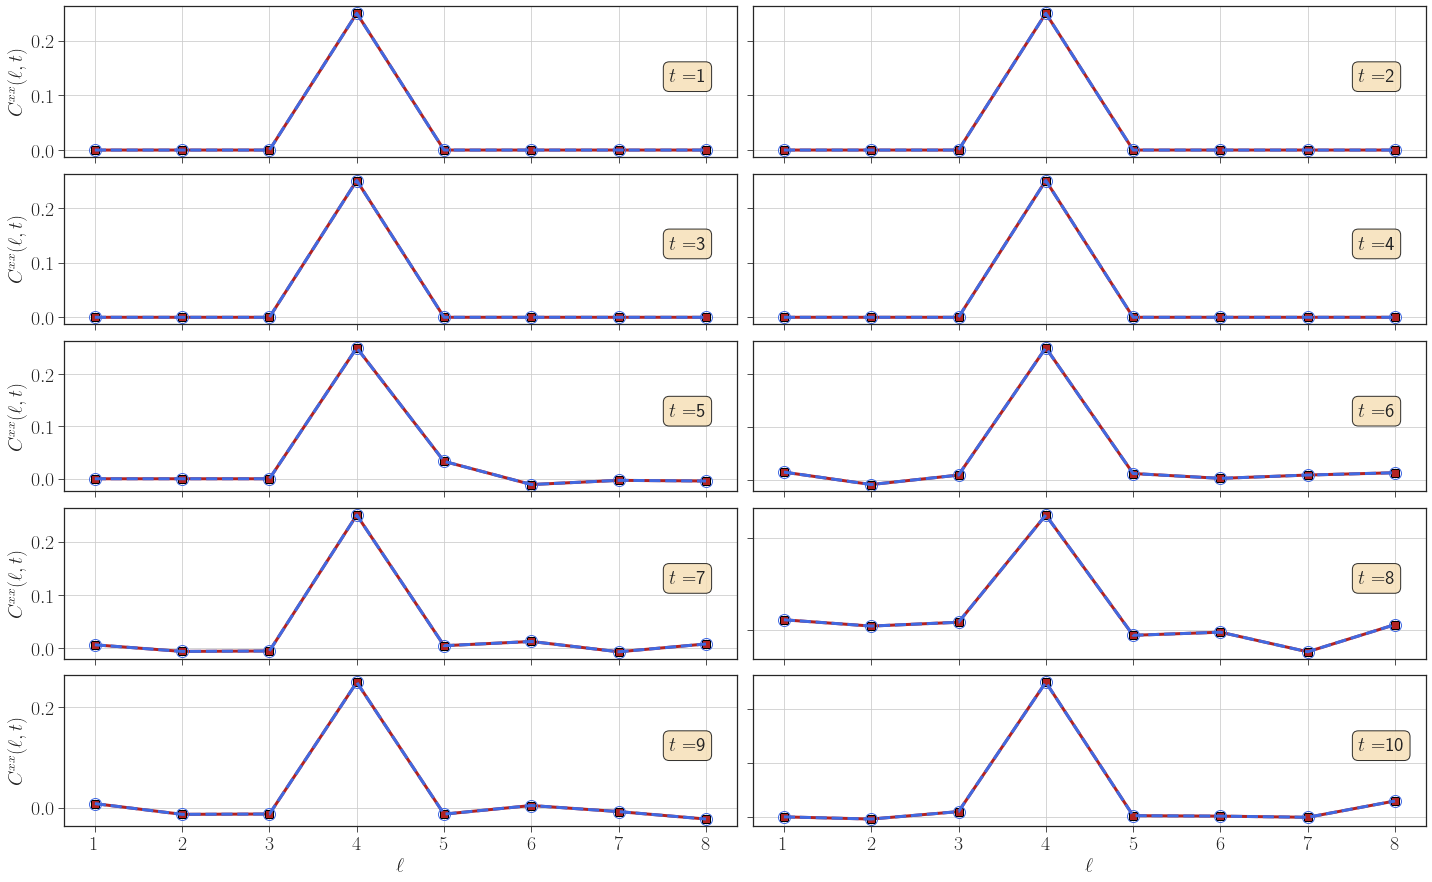

In [120]:
'''
    Plot time evolution of spin correlation function
'''

fig = plt.figure(figsize = (20, 20 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 5, ncols = 2, figure = fig)
plt.style.use('seaborn-ticks')

ED_Czz = np.array(fileED['Cxx']); print(ED_Czz.shape)
TEBD_Czz = np.array(fileTEBD['Cxx']); print(TEBD_Czz.shape)

for ind in range(timeSlice):
    tmp1 = ind // 2
    tmp2 = ind % 2
    ax1 = fig.add_subplot(spec[tmp1, tmp2])
    ax1.plot(np.arange(1, 9, 1), np.real(ED_Czz[0 * physicalSite : 1 * physicalSite, ind]), linewidth = 3, color = 'firebrick', \
             marker = 's', markersize = 8, markeredgecolor = 'black') 
    ax1.plot(np.arange(1, 9, 1), np.real(TEBD_Czz[0 * physicalSite : 1 * physicalSite, ind * 10]), linewidth = 3, linestyle = "--", color = 'royalblue', \
             marker = 'o', markersize = 12, markerfacecolor = "none") 
    
    if ind >= 8:
        ax1.set_xlabel(r'$\ell$', fontsize = 20)
    else:
        ax1.set_xticklabels([])
        
    if ind % 2 == 0:
        ax1.set_ylabel(r'$C^{xx}(\ell, t)$', fontsize = 20)
    else:
        ax1.set_yticklabels([])
        
    ax1.tick_params(axis = "both", which = "major", labelsize = 20)
    ax1.text(.9, .5, r'$t = $' + str(ind + 1), transform = ax1.transAxes, fontsize = 20, 
            bbox = dict(boxstyle = "round", facecolor = 'wheat', alpha = .8))
    ax1.grid()

# plt.savefig("TEBD_ED_N8_h0.0_Czz.pdf")

In [69]:
Czz[:, 0]

array([0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
       0.  +0.j, 0.  +0.j])

#### Analyze ED results with only kicked part

In [274]:
fileED = h5py.File("ED_N8_h0.2_Info_Kick.h5", "r")

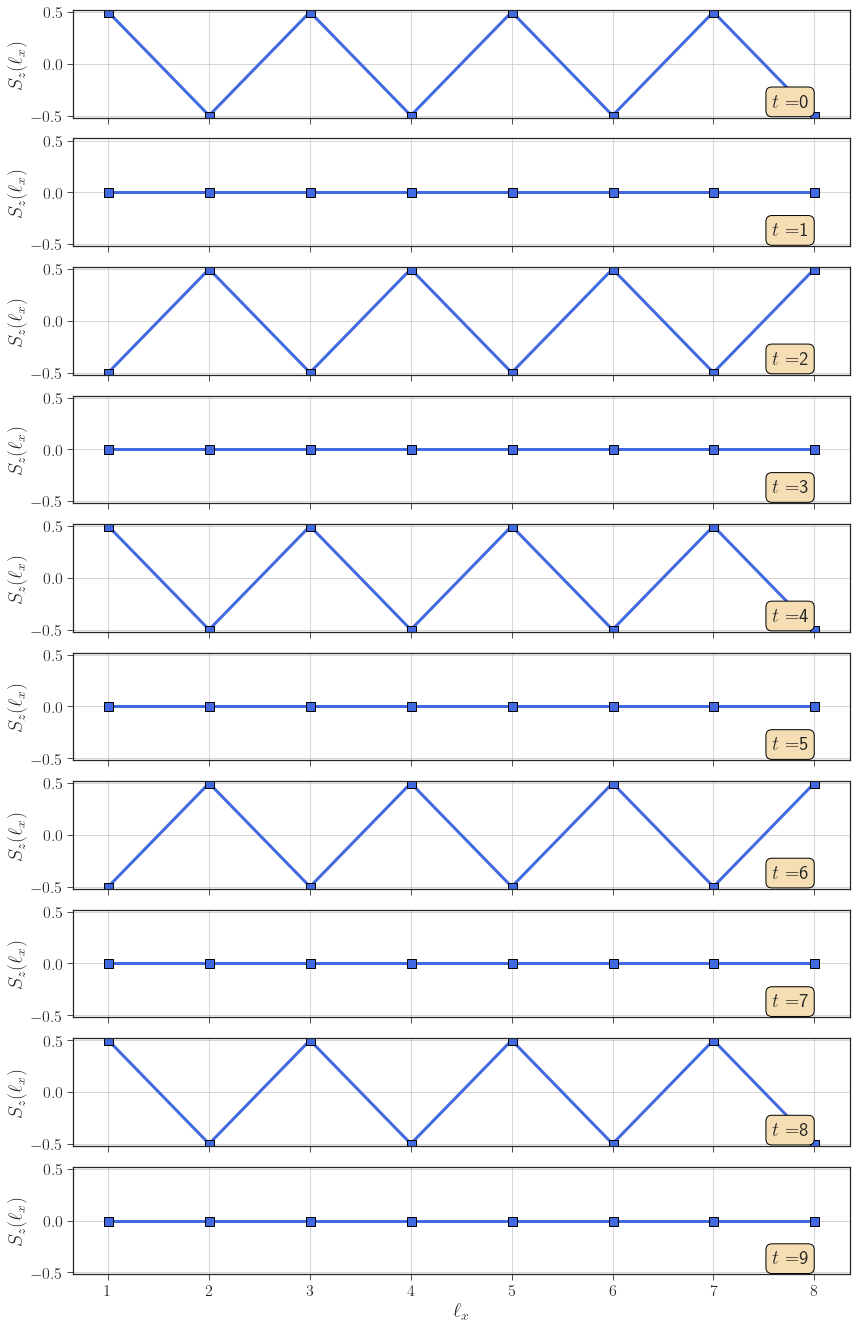

In [343]:
'''
    Plot time evolution of Sz on physical sites
'''

fig = plt.figure(figsize = (12, 30 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 10, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

ED_Sz = np.array(fileED['Sz'])
for ind in range(timeSlice):
    ax1 = fig.add_subplot(spec[ind, 0])
    ax1.plot(np.arange(1, 9, 1), np.real(ED_Sz[:, ind]), linewidth = 3, color = 'royalblue', \
             marker = 's', markersize = 9, markeredgecolor = 'black')
    ax1.grid()
    
    if ind == timeSlice - 1:
        ax1.set_xlabel(r'$\ell_{x}$', fontsize = 20)
    else:
        ax1.set_xticklabels([])
    ax1.set_ylim(-0.52, 0.52)
    ax1.set_ylabel(r'$S_{z}(\ell_{x})$', fontsize = 20)
    ax1.tick_params(axis = "both", which = "major", labelsize = 16)
    ax1.text(.9, .1, r'$t = $' + str(ind), transform = ax1.transAxes, fontsize = 20, 
            bbox = dict(boxstyle = "round", facecolor = 'wheat', alpha = 1.))
    
plt.savefig('Figures/ED_N8_Kick_Sz.pdf')

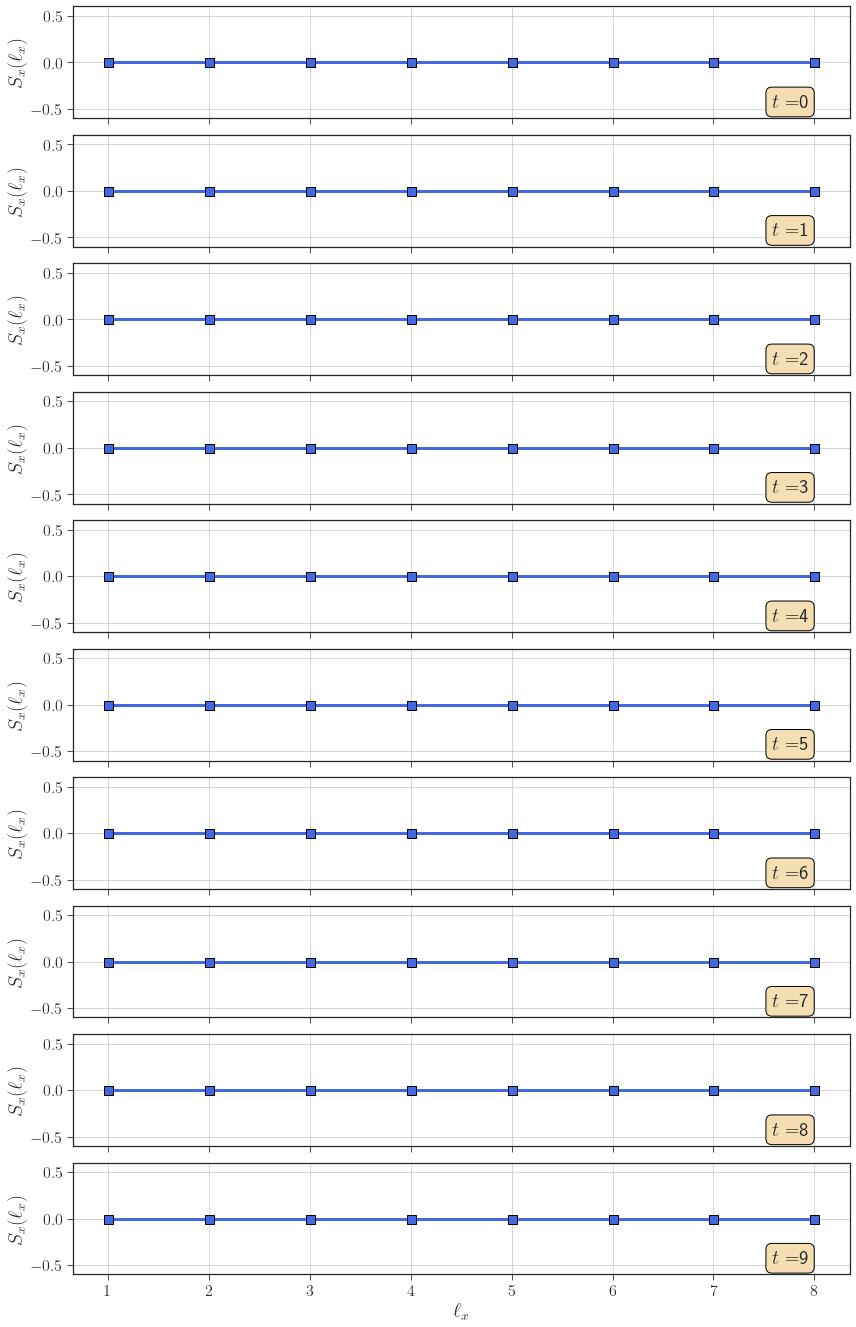

In [344]:
'''
    Plot time evolution of Sz on physical sites
'''

fig = plt.figure(figsize = (12, 30 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 10, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

ED_Sx = np.array(fileED['Sx'])
for ind in range(timeSlice):
    ax1 = fig.add_subplot(spec[ind, 0])
    ax1.plot(np.arange(1, 9, 1), np.real(ED_Sx[:, ind]), linewidth = 3, color = 'royalblue', \
             marker = 's', markersize = 9, markeredgecolor = 'black')
    ax1.grid()
    
    if ind == timeSlice - 1:
        ax1.set_xlabel(r'$\ell_{x}$', fontsize = 20)
    else:
        ax1.set_xticklabels([])
    ax1.set_ylim(-0.6, 0.6)
    ax1.set_ylabel(r'$S_{x}(\ell_{x})$', fontsize = 20)
    ax1.tick_params(axis = "both", which = "major", labelsize = 16)
    ax1.text(.9, .1, r'$t = $' + str(ind), transform = ax1.transAxes, fontsize = 20, 
            bbox = dict(boxstyle = "round", facecolor = 'wheat', alpha = 1.))
    
plt.savefig('Figures/ED_N8_Kick_Sx.pdf')

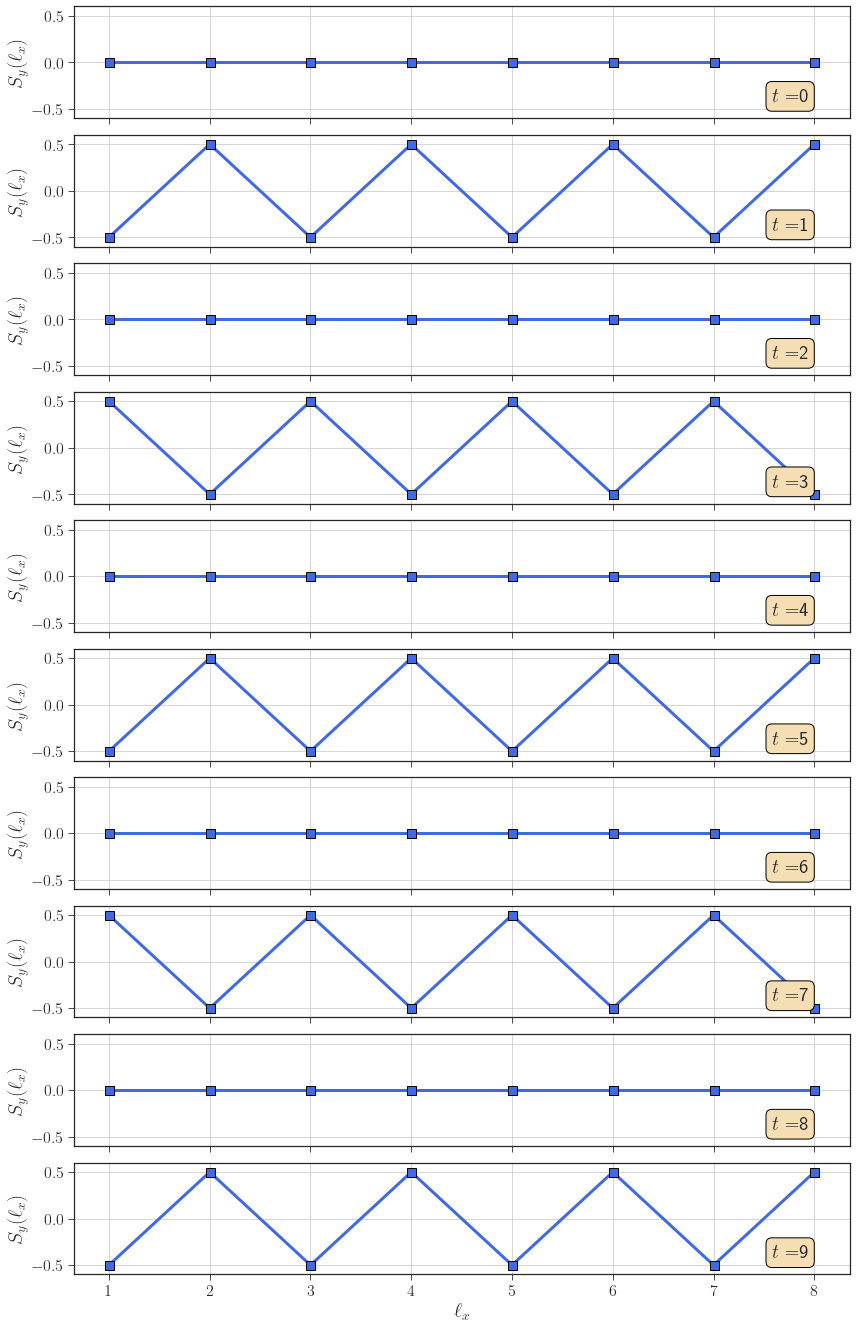

In [345]:
'''
    Plot time evolution of Sz on physical sites
'''

fig = plt.figure(figsize = (12, 30 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 10, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

ED_Sy = np.array(fileED['Sy'])
for ind in range(timeSlice):
    ax1 = fig.add_subplot(spec[ind, 0])
    ax1.plot(np.arange(1, 9, 1), np.real(ED_Sy[:, ind]), linewidth = 3, color = 'royalblue', \
             marker = 's', markersize = 9, markeredgecolor = 'black')
    ax1.grid()
    
    if ind == timeSlice - 1:
        ax1.set_xlabel(r'$\ell_{x}$', fontsize = 20)
    else:
        ax1.set_xticklabels([])
    ax1.set_ylim(-0.6, 0.6)
    ax1.set_ylabel(r'$S_{y}(\ell_{x})$', fontsize = 20)
    ax1.tick_params(axis = "both", which = "major", labelsize = 16)
    ax1.text(.9, .15, r'$t = $' + str(ind), transform = ax1.transAxes, fontsize = 20, 
            bbox = dict(boxstyle = "round", facecolor = 'wheat', alpha = 1.))
    
plt.savefig('Figures/ED_N8_Kick_Sy.pdf')